In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ccode_iso = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

df_footprint_region = pd.read_excel("D:/kerja/asisten riset/code v/review/CF_emisi_total_GFRAC_AM1.xlsx")
df_intensity_region = pd.read_excel("D:/kerja/asisten riset/code v/review/CI_emisi_total_FAO_AM1.xlsx")

In [3]:
df_footprint_region = df_footprint_region.rename(columns={"NGFBFC" : "IMAGE Classification"})
df_footprint_region = df_footprint_region.drop(columns=['Unnamed: 0'])
df_footprint_region.head()

,IMAGE Region Name,time,IMAGE Classification,CF
0,Brazil,1975,maize,34.680581
1,Brazil,1980,maize,18.238775
2,Brazil,1985,maize,13.753878
3,Brazil,1990,maize,33.292739
4,Brazil,1995,maize,74.606467


In [4]:
df_footprint_region['IMAGE Classification'] = df_footprint_region['IMAGE Classification'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices')
df_footprint_region['IMAGE Classification'] = df_footprint_region['IMAGE Classification'].replace('other temperate cereals', 'temperate cereals')

In [5]:
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')

In [6]:
df_intensity_region = df_intensity_region.rename(columns={"NGFBFC" : "IMAGE Classification", "Carbon Intensity" : "CI"})
df_intensity_region = df_intensity_region.drop(columns=['Unnamed: 0'])
df_intensity_region.head()

,IMAGE Region Name,time,IMAGE Classification,CI
0,Brazil,1975,maize,25.007746
1,Brazil,1975,oil & palm fruit,6.171853
2,Brazil,1975,other non-food & luxury & spices,62.137203
3,Brazil,1975,other temperate cereals,97.104565
4,Brazil,1975,plant based fibres,91.987175


In [7]:
df_intensity_region['IMAGE Classification'] = df_intensity_region['IMAGE Classification'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices')
df_intensity_region['IMAGE Classification'] = df_intensity_region['IMAGE Classification'].replace('other temperate cereals', 'temperate cereals')

In [8]:
df_intensity_region['IMAGE Region Name'] = df_intensity_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_intensity_region['IMAGE Region Name'] = df_intensity_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_intensity_region['IMAGE Region Name'] = df_intensity_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_intensity_region['IMAGE Region Name'] = df_intensity_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_intensity_region['IMAGE Region Name'] = df_intensity_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')

In [9]:
df_footprint_region = df_footprint_region[df_footprint_region['CF'] <= 100]
df_intensity_region = df_intensity_region[df_intensity_region['CI'] <= 100]

def highlight_region(data, prams1, params2, params3, params4):
    by_region = data[(data['IMAGE Region Name'] == prams1) & (data['IMAGE Classification'] == params4) | (data['IMAGE Region Name'] == params2) & (data['IMAGE Classification'] == params4) | (data['IMAGE Region Name'] == params3) & (data['IMAGE Classification'] == params4)]
    return by_region

In [12]:
highlight_region(df_intensity_region, 'Brazil', 'Indonesia region', 'Rest of South America', 'temperate cereals')

,IMAGE Region Name,time,IMAGE Classification,CI
3,Brazil,1975,temperate cereals,97.104565
19,Brazil,1980,temperate cereals,38.338944
35,Brazil,1985,temperate cereals,19.293652
51,Brazil,1990,temperate cereals,40.311046
67,Brazil,1995,temperate cereals,97.020150
83,Brazil,2000,temperate cereals,24.297542
99,Brazil,2005,temperate cereals,13.609907
115,Brazil,2010,temperate cereals,0.821909
131,Brazil,2015,temperate cereals,10.880988
147,Brazil,2020,temperate cereals,2.304429


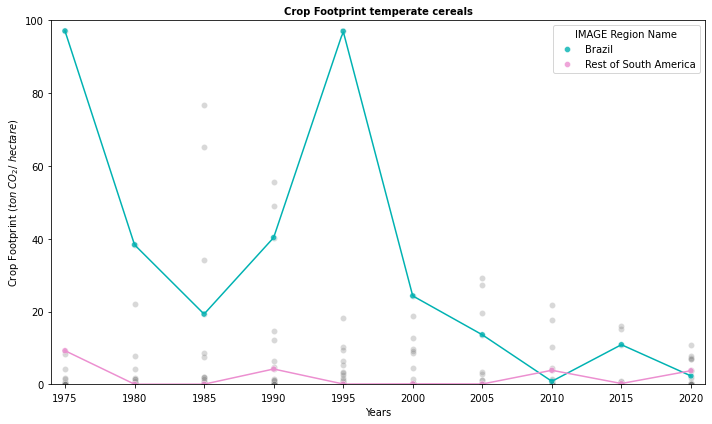

In [33]:
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as plticker
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3', 'Rest of Southern Africa':'#FF0000','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#EC8FD0','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

regions_to_plot = ['Brazil', 'Indonesia region', 'Rest of South America']
highlight_data = highlight_region(df_intensity_region, regions_to_plot[0], regions_to_plot[1], regions_to_plot[2], 'temperate cereals')

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(f"Crop Footprint temperate cereals", fontsize=10, fontweight="bold")
ax.set_xlabel('Years')
ax.set_ylabel('Crop Footprint ($ton~CO_2/~hectare$)')

# Scatter plot highlight
sns.scatterplot(x="time", y="CI", color='grey',
                sizes=(100, 300), alpha=.3, data=df_intensity_region[df_intensity_region['IMAGE Classification'] == "temperate cereals"])

# Scatter plot highlight
sns.scatterplot(x="time", y="CI", hue='IMAGE Region Name', 
                sizes=(100, 300), alpha=.8, palette=palettes, 
                data=highlight_data)

# Plot lines for each region
for region in regions_to_plot:
    region_data = highlight_data[highlight_data['IMAGE Region Name'] == region]
    region_data = region_data.sort_values('time')  # Sort by time to connect the points correctly
    
    # Optionally smooth the line (comment out if you don't want smoothing)
    if region_data['CI'].values.size > 0:
        xnew = np.linspace(region_data['time'].min(), region_data['time'].max(), 300)
        spl = make_interp_spline(region_data['time'], region_data['CI'], k=1)  # k=1 for linear interpolation
        y_smooth = spl(xnew)
    
        # Plot the smoothed line
        ax.plot(xnew, y_smooth, label=f"{region}", color=palettes[region])
    
loc = plticker.MultipleLocator(base=5.0)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', which='major', pad=5)

ax.set_xlim(1974, 2021)
ax.set_ylim(0, 100)

# Set legend
# ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')

plt.tight_layout()
plt.show()

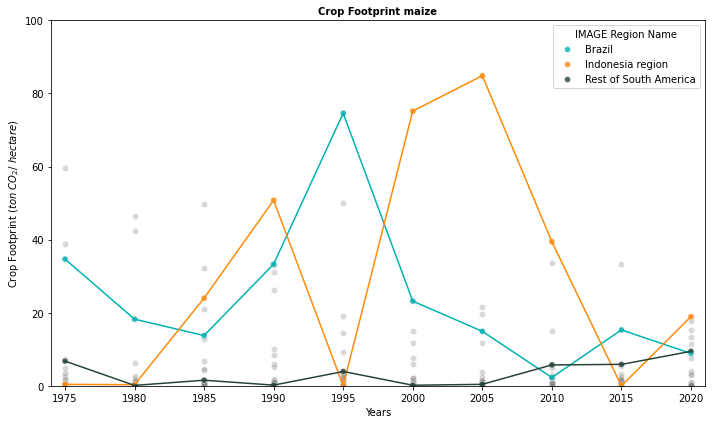

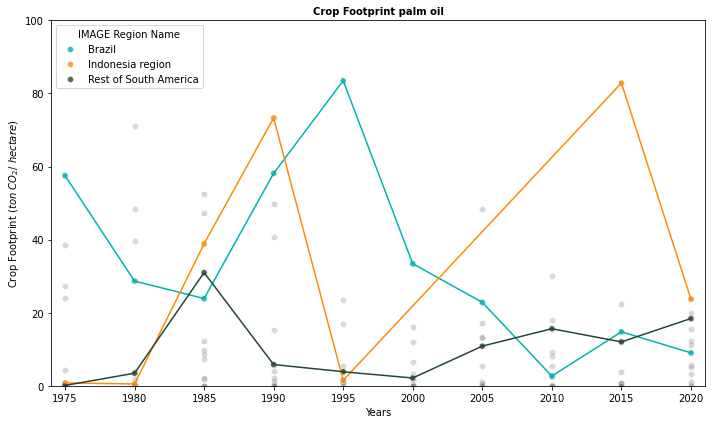

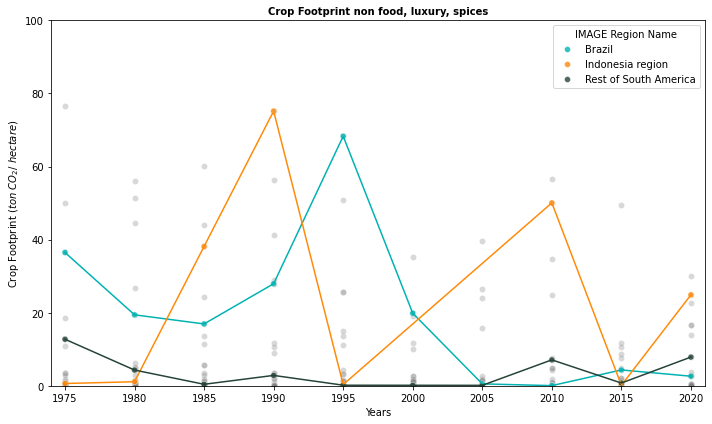

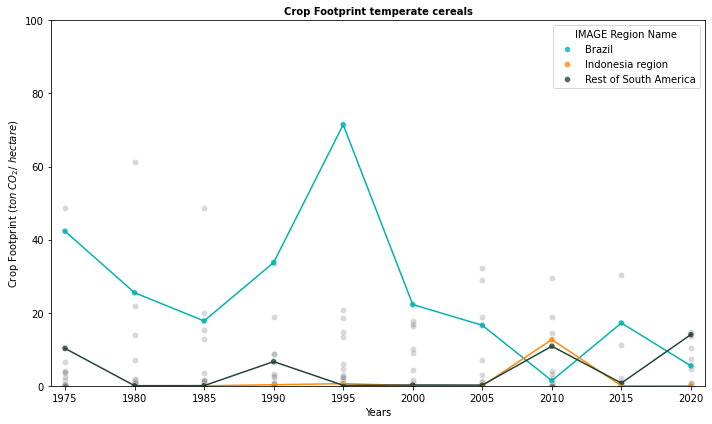

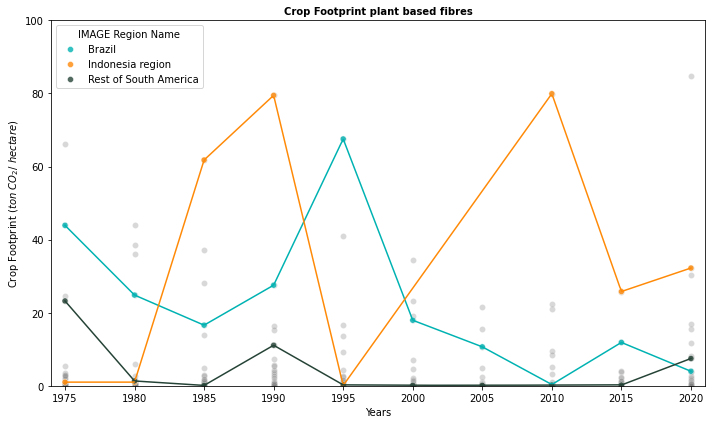

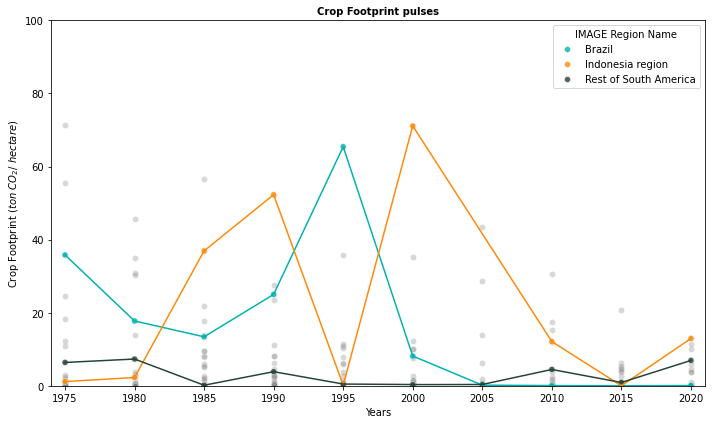

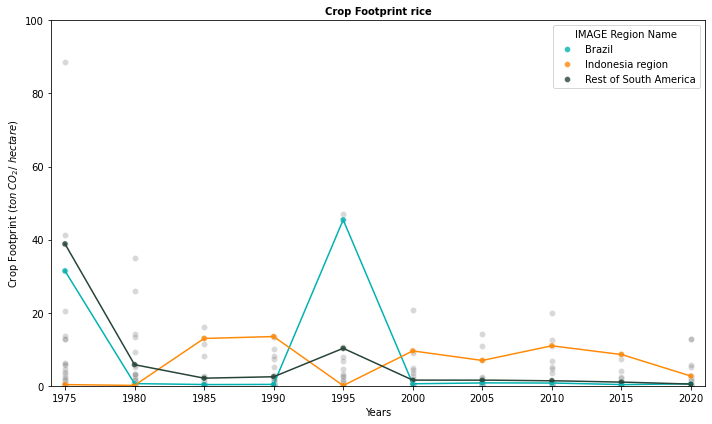

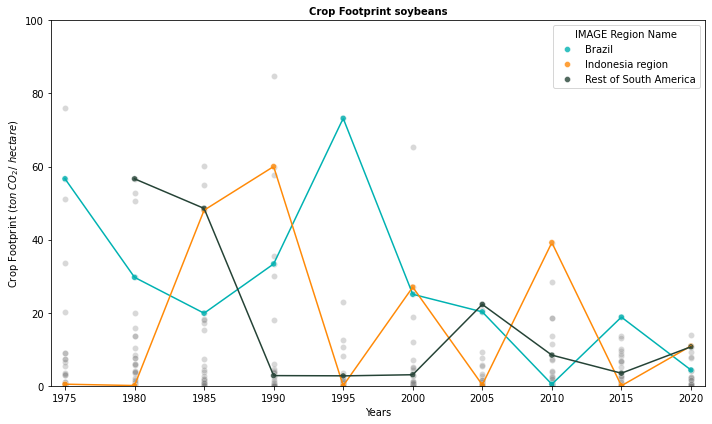

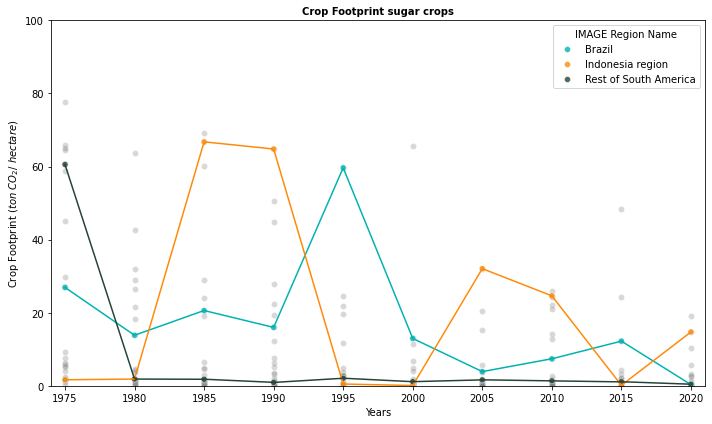

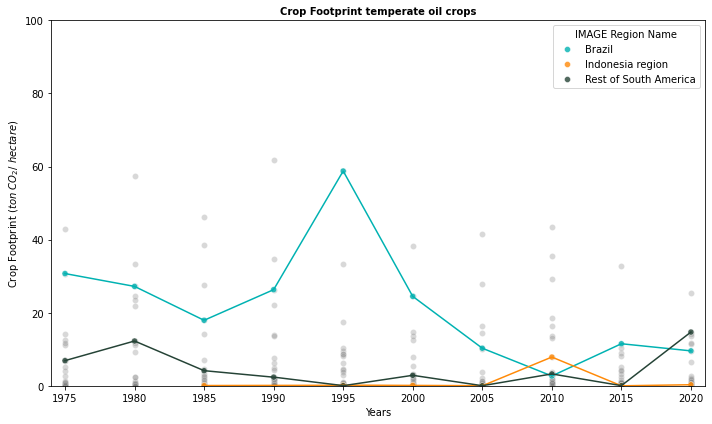

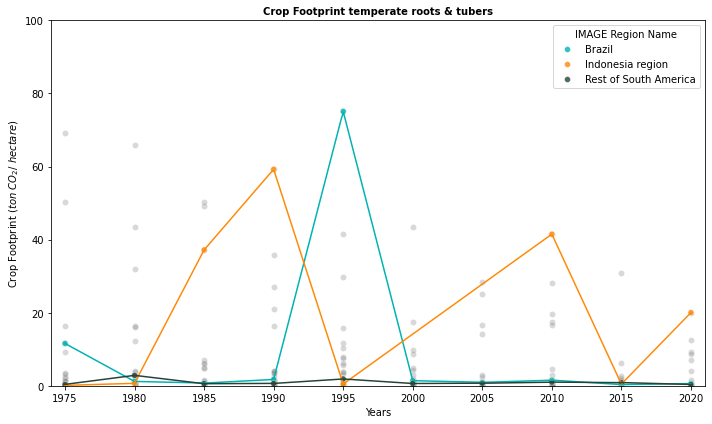

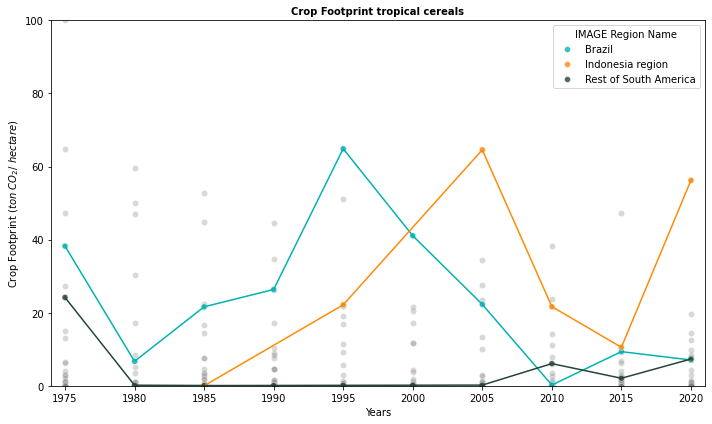

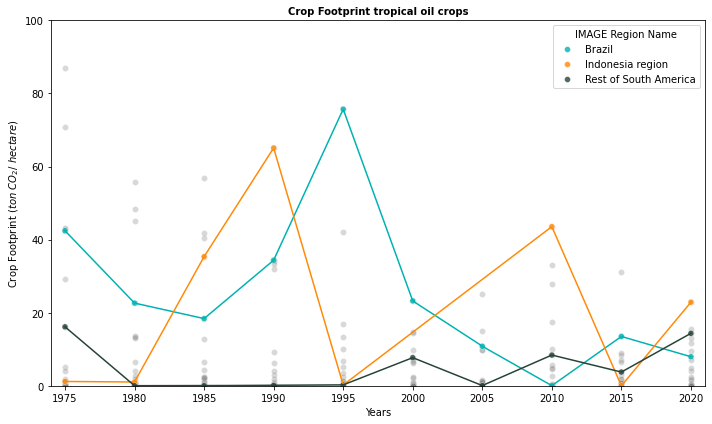

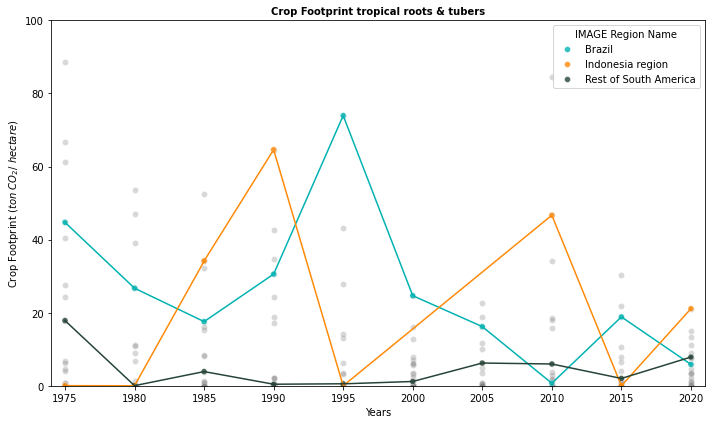

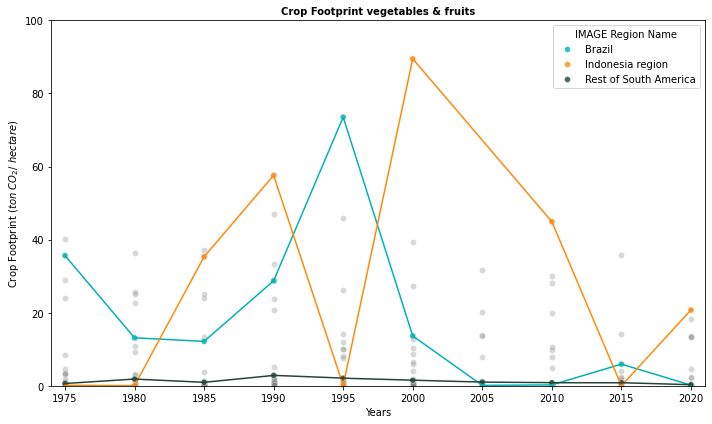

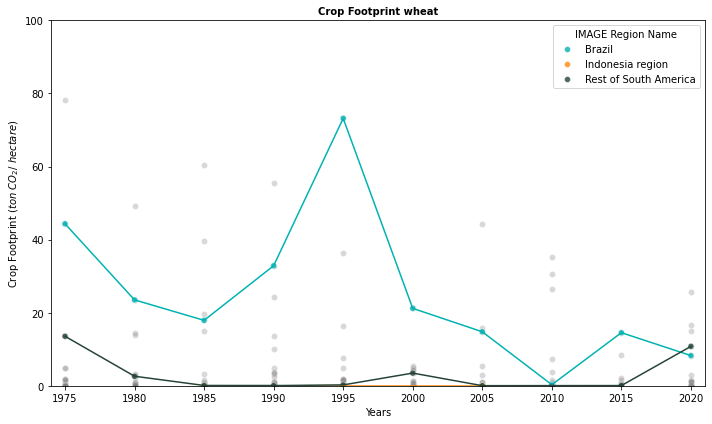

In [110]:
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as plticker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3', 'Rest of Southern Africa':'#FF0000','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

regions_to_plot = ['Brazil', 'Indonesia region', 'Rest of South America']

for crops in df_footprint_region['IMAGE Classification'].unique():
    highlight_data = highlight_region(df_footprint_region, regions_to_plot[0], regions_to_plot[1], regions_to_plot[2], crops)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Crop Footprint {crops}", fontsize=10, fontweight="bold")
    ax.set_xlabel('Years')
    ax.set_ylabel('Crop Footprint ($ton~CO_2/~hectare$)')

    # Scatter plot highlight
    sns.scatterplot(x="time", y="CF", color='grey',
                    sizes=(100, 300), alpha=.3, data=df_footprint_region[df_footprint_region['IMAGE Classification'] == crops])

    # Scatter plot highlight
    sns.scatterplot(x="time", y="CF", hue='IMAGE Region Name', 
                    sizes=(100, 300), alpha=.8, palette=palettes, 
                    data=highlight_data)

    for region in regions_to_plot:
        region_data = highlight_data[highlight_data['IMAGE Region Name'] == region]
        region_data = region_data.sort_values('time')
        
        xnew = np.linspace(region_data['time'].min(), region_data['time'].max(), 300)
        spl = make_interp_spline(region_data['time'], region_data['CF'], k=1)
        y_smooth = spl(xnew)
        
        # Plot the smoothed line
        ax.plot(xnew, y_smooth, label=f"{region}", color=palettes[region])
        
    loc = plticker.MultipleLocator(base=5.0)
    ax.xaxis.set_major_locator(loc)
    ax.set_ylim(0, 100)
    ax.set_xlim(1974, 2021)

    plt.tight_layout()
    plt.show()

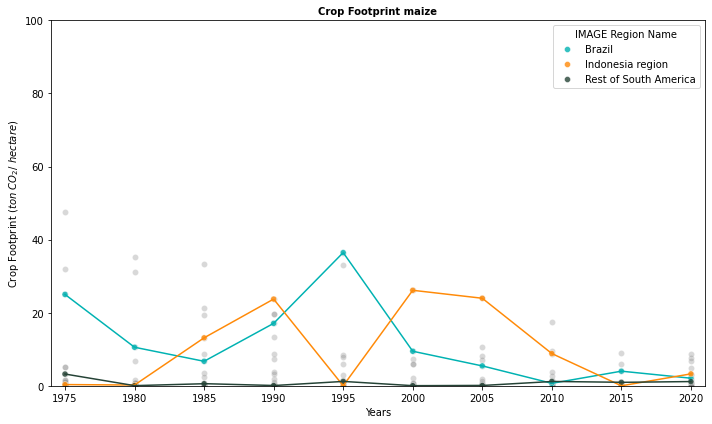

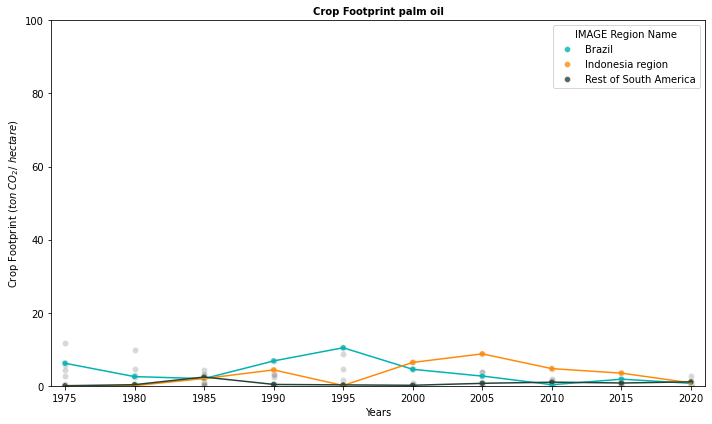

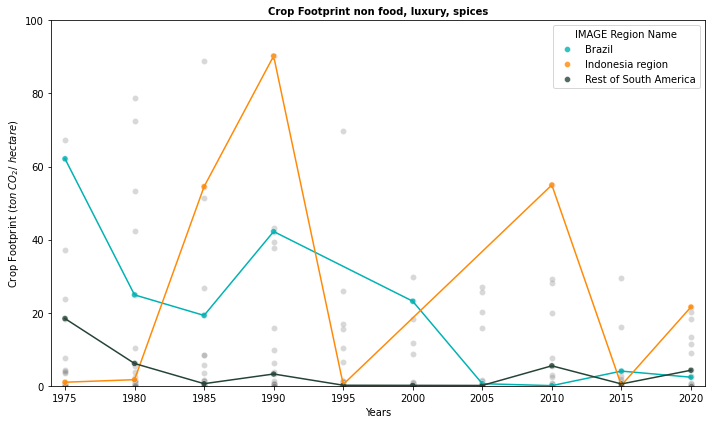

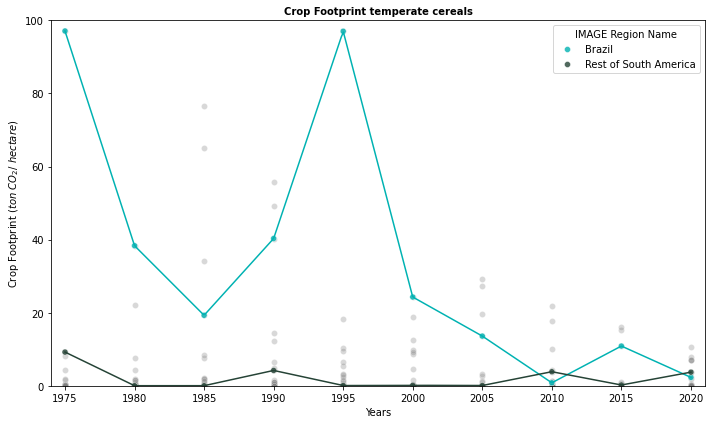

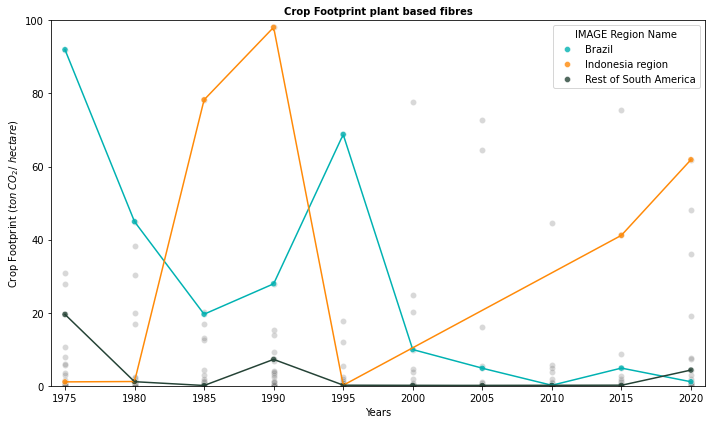

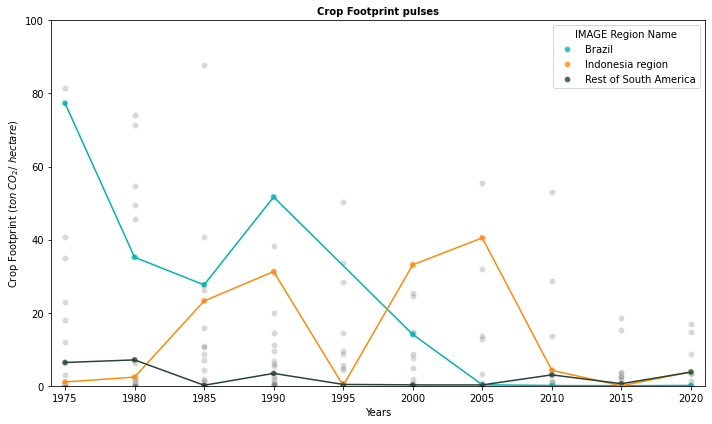

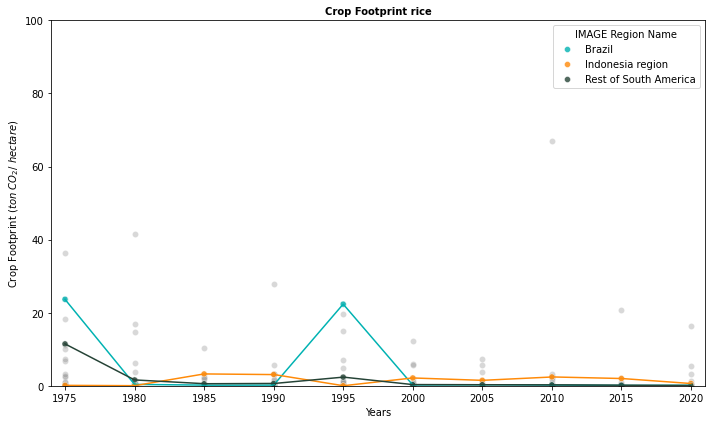

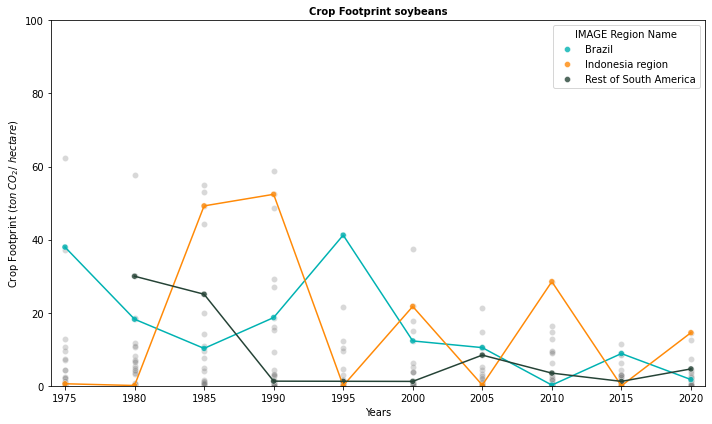

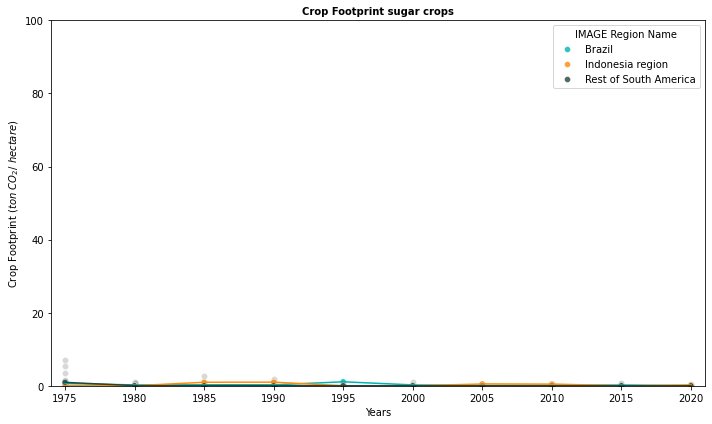

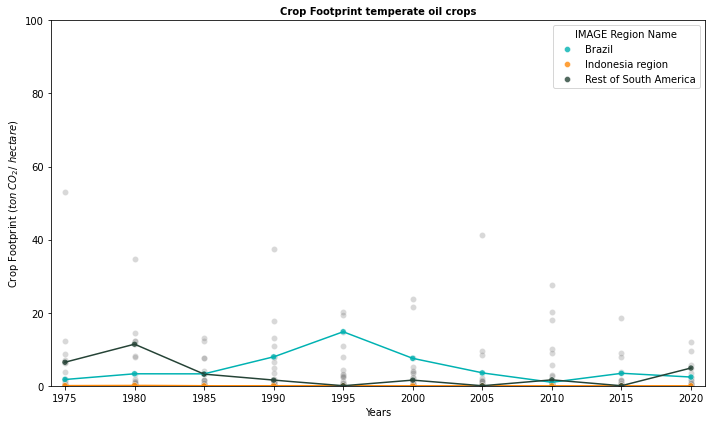

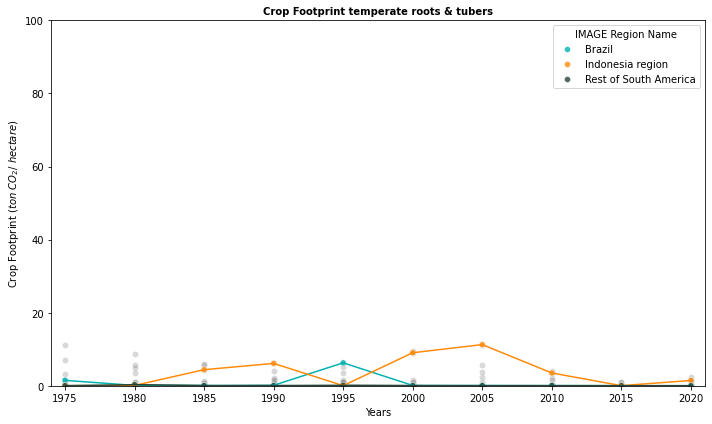

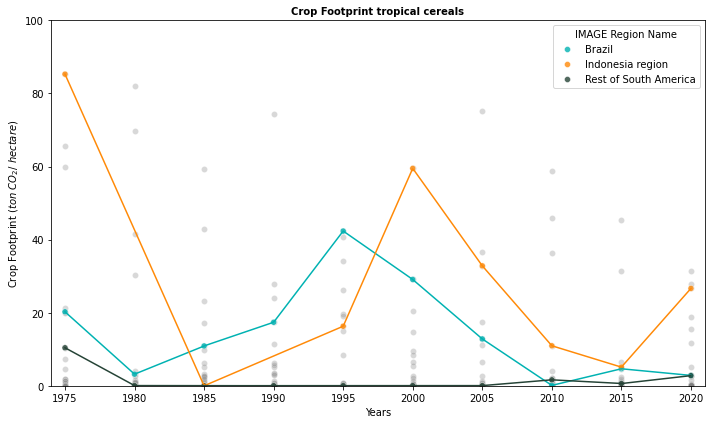

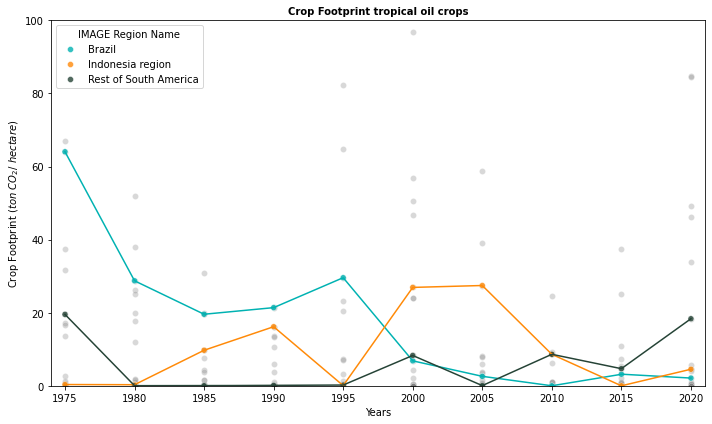

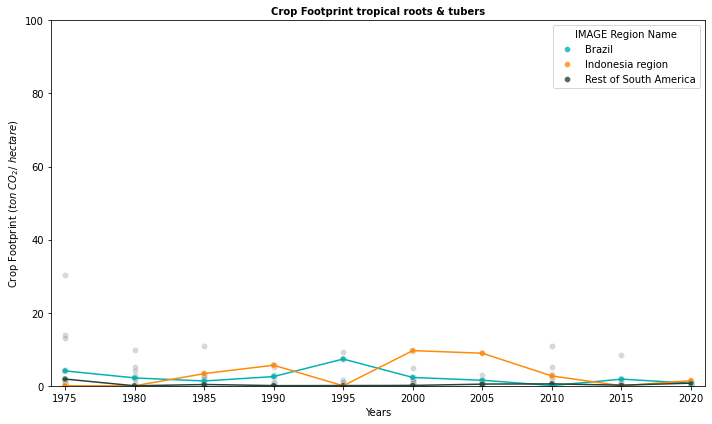

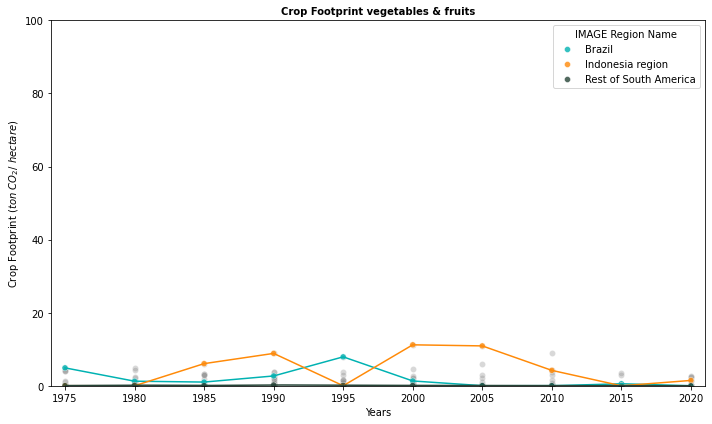

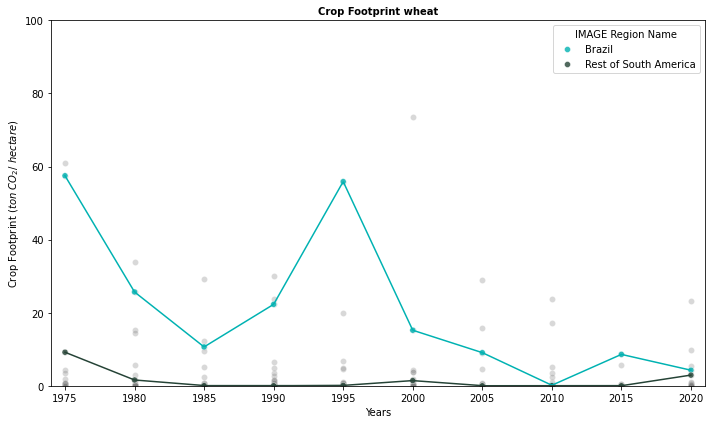

In [35]:
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as plticker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3', 'Rest of Southern Africa':'#FF0000','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

regions_to_plot = ['Brazil', 'Indonesia region', 'Rest of South America']

for crops in df_intensity_region['IMAGE Classification'].unique():
    highlight_data = highlight_region(df_intensity_region, regions_to_plot[0], regions_to_plot[1], regions_to_plot[2], crops)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Crop Footprint {crops}", fontsize=10, fontweight="bold")
    ax.set_xlabel('Years')
    ax.set_ylabel('Crop Footprint ($ton~CO_2/~hectare$)')

    # Scatter plot highlight
    sns.scatterplot(x="time", y="CI", color='grey',
                    sizes=(100, 300), alpha=.3, data=df_intensity_region[df_intensity_region['IMAGE Classification'] == crops])

    # Scatter plot highlight
    sns.scatterplot(x="time", y="CI", hue='IMAGE Region Name', 
                    sizes=(100, 300), alpha=.8, palette=palettes, 
                    data=highlight_data)

    for region in regions_to_plot:
        region_data = highlight_data[highlight_data['IMAGE Region Name'] == region]
        region_data = region_data.sort_values('time')

        if region_data['CI'].values.size > 0:
            xnew = np.linspace(region_data['time'].min(), region_data['time'].max(), 300)
            spl = make_interp_spline(region_data['time'], region_data['CI'], k=1)  # k=1 for linear interpolation
            y_smooth = spl(xnew)
        
            # Plot the smoothed line
            ax.plot(xnew, y_smooth, label=f"{region}", color=palettes[region])
        
    loc = plticker.MultipleLocator(base=5.0)
    ax.xaxis.set_major_locator(loc)
    ax.set_ylim(0, 100)
    ax.set_xlim(1974, 2021)

    plt.tight_layout()
    plt.show()